In [1]:
# Скачать датасет о качестве КРАСНОГО вина по ссылке. https://archive.ics.uci.edu/ml/datasets/wine+quality

# Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt #работает с графиками и диаграммами
import seaborn as sns #работает с графиками и диаграммами

In [3]:
# Считываем датасет
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [9]:
# На основе переменной quality с оценками вина создать новую переменную good: если quality > 5, то 1, иначе 0.

df['good'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


In [10]:
# Исследовать, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим, с применением не менее 5 диаграмм из урока.
# Отчет сделать в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

# Выбираем стиль оформления диаграмм
plt.style.use('fivethirtyeight')

In [11]:
# Готовим данные для графика в виде сводной таблицы
data1 = df.groupby('quality')['fixed acidity'].agg(fixed_acidity = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data1.head(10)

,quality,fixed_acidity
6,9,7.420000
5,8,6.657143
4,7,6.734716
3,6,6.837671
2,5,6.933974
1,4,7.129448
0,3,7.600000


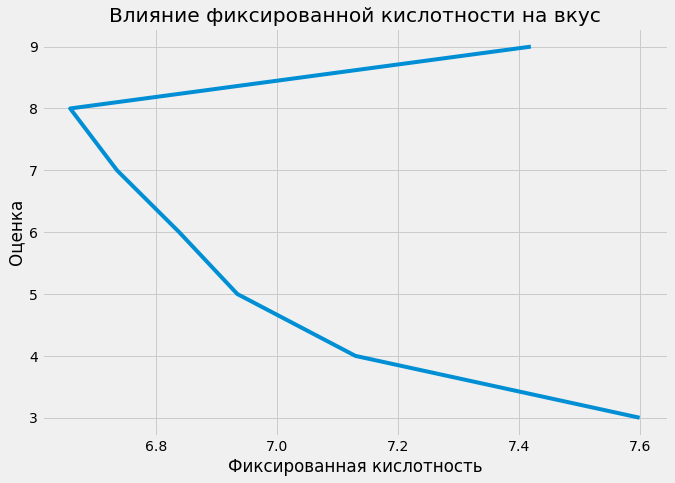

In [12]:
# Создаем линейный график
plt.figure(figsize = (10,7))

plt.plot(data1['fixed_acidity'], data1['quality'])

plt.title('Влияние фиксированной кислотности на вкус')
plt.xlabel('Фиксированная кислотность')
plt.ylabel('Оценка')

plt.show()

Исходя из данных на графике можно сделать вывод, что вкус вина улучшается со снижением фиксированной кислотности

In [13]:
# Готовим данные для графика в виде сводной таблицы
data2 = df.groupby('quality')['residual sugar'].agg(residual_sugar = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data2.head(10)

,quality,residual_sugar
6,9,4.120000
5,8,5.671429
4,7,5.186477
3,6,6.441606
2,5,7.334969
1,4,4.628221
0,3,6.392500


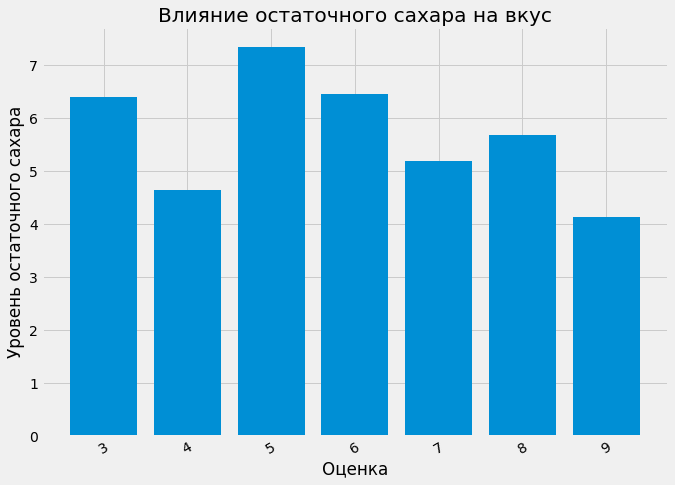

In [14]:
# Строим столбчатую диаграмму

plt.figure(figsize = (10,7))

plt.bar(data2['quality'],data2['residual_sugar'])

plt.title('Влияние остаточного сахара на вкус')
plt.xlabel('Оценка')
plt.ylabel('Уровень остаточного сахара')
plt.xticks(rotation = 30)

plt.show()

Исходя из данных графика, получается что самое вкусное вино при остаточном сахаре > 7

In [17]:
# Готовим данные для графика в виде сводной таблицы
data3 = df.groupby('quality')['alcohol'].agg(alcohol = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data3.head(10)

,quality,alcohol
6,9,12.180000
5,8,11.636000
4,7,11.367936
3,6,10.575372
2,5,9.808840
1,4,10.152454
0,3,10.345000


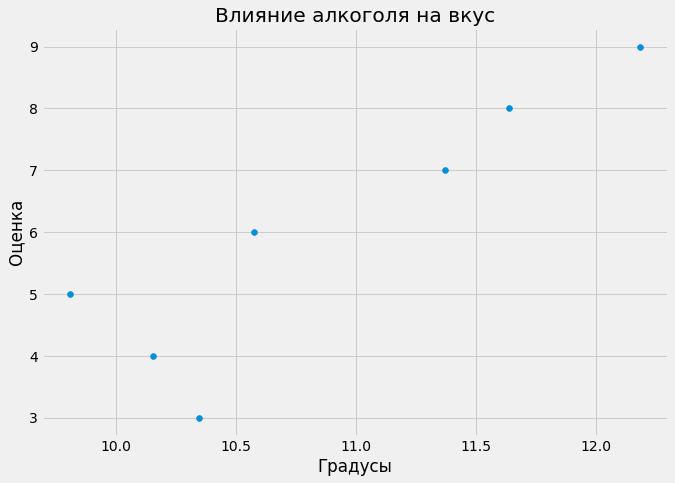

In [18]:
# Строим диаграмму рассеяния

plt.figure(figsize = (10,7))

plt.scatter(data3['alcohol'], data3['quality'])

plt.title('Влияние алкоголя на вкус')
plt.xlabel('Градусы')
plt.ylabel('Оценка')

plt.show()

Исходя из данных графика, получается что чем выше крепость вина, тем его вкус становится лучше.

In [19]:
# Готовим данные для графика
data4 = df['good'].value_counts()
data4.head()

1    3258
0    1640
Name: good, dtype: int64

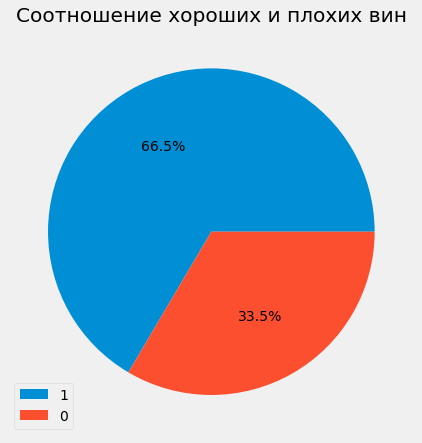

In [20]:
# Строим круговую диаграмму

plt.figure(figsize = (10,7))

plt.pie(data4, autopct='%1.1f%%')

plt.title('Соотношение хороших и плохих вин')
plt.legend(data4.index)

plt.show()

Исходя из данных графика, мы видим что количество хороших вин больше, чем плохих.

In [21]:
# Строим корреляциогнную матрицу
correlation = df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663,-0.089749
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723,-0.225440
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209,-0.000700
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577,-0.092756
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934,-0.183939
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158,-0.001278
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737,-0.170924
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123,-0.268696
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427,0.083687
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678,0.051858


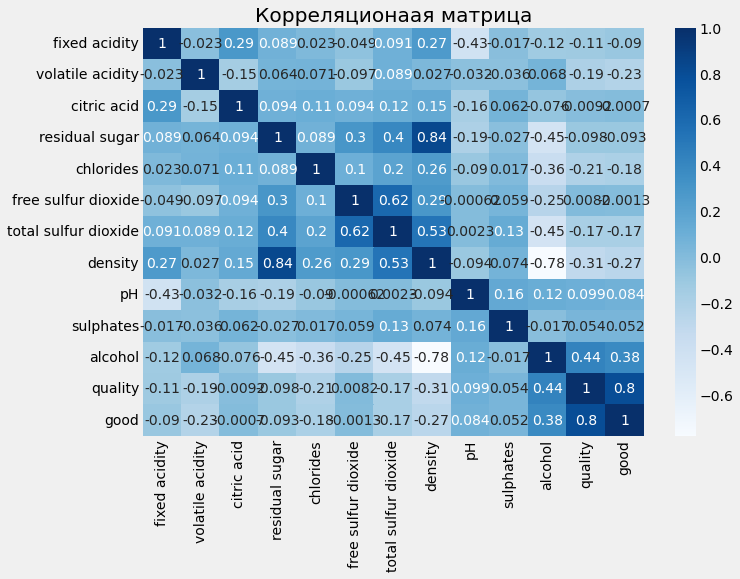

In [22]:
# Строим хитмэп по матрице корреляций
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.title('Корреляционаая матрица')
plt.show()

Здесь мы можем увидеть, что самая сильная зависимость у density (плотности) и residual sugar (остаточного сахара)